In [1]:
#First of all let us import our necessarry libraries.
import pandas as pd
from pandas import DataFrame , Series
import numpy as np
#Given below libraries are used for Data Visualization.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Now we need to import our dataset name as 'train' which is a csv file into a DataFrame names as titanic_df.
titanic_df = pd.read_csv('train.csv')

In [3]:
#For confirming our import was succesfull or not we will see a preview of our data.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#By using this we get overall summary of our data.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now, the real game begins we will answer the questions mentioned in the 'README.md' file.

Q1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

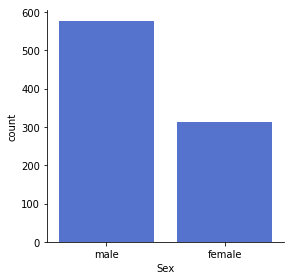

In [5]:
#Let's start with the Gender to see how many number of males and females were on the ship, for we will use a factorplot
sns.factorplot('Sex',data=titanic_df,kind='count',color='royalblue')

From the graph above we can easliy conclude that more number of males were on-board as compared to females.

Next comes the class so now will try to seperate gender by classes 

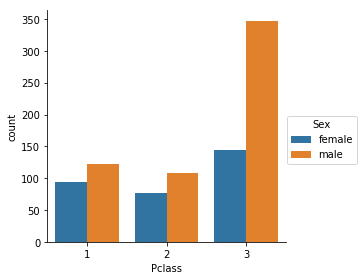

In [6]:
#We will again use the factorplot for this 
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex',hue_order=['female','male'])

This factorplot gives us an insight that the difference of number of males and females were much less in the classes 1 & 2 however there is a great difference in of number of males and females in class 3, also it can be seen that most of the passengers on ship were of class 3 .

Let us classify this data further more because at that time childrens were also on the ship and instead of showing them seperately in dataset they have been classified into male and female ,so now we will split this data into male,female and children 

In [7]:
#Given below we have designed a function for this purpose,anyone whose age is below 16 will be considered as child else as a male or female
#This function has passenger as formal parameter
def male_female_child(passenger):
#Both age and sex from dataset are passed as actual parameter to this function and stored in passenger    
    age,sex = passenger
#If the age of person in below 16 the function will return its Sex as Child else will return its orignal Sex(male,female)
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
#In the piece of code given below we are creating a new column in our Dataset as 'person' which take its input from the values returned from the function declared above 
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [9]:
#Let's check whether it worked or not,by viewinf first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Bravo!!! it worked now we will plot our data again to see the number of males, females and children that were on the ship. 

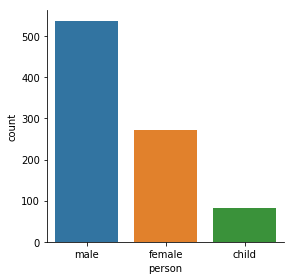

In [10]:
#Using the factorplot again to preview the data
sns.factorplot('person',data=titanic_df,kind='count')

Now again we must split this among classes to get a more clear perspective

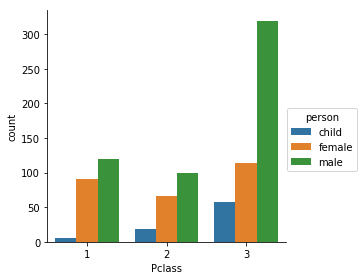

In [11]:
#Using factor plot and its 'hue' argument to plot the data between Class and Sex
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person',hue_order=['child','female','male'])

You will be surprised to see that most the children boarding on the ship were of class 3 and very few number of children were from class 1.

Great! Now let us focus on the Age of passengers boarded on ship.

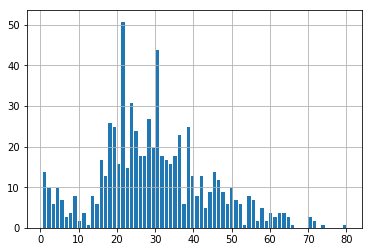

In [12]:
#For plotting the age we use histogram, and we use a bin size of 70 that means we would intake data at certain discrete intervals
titanic_df['Age'].hist(bins=70,ec='white')

The histogram clearly tells us that most people that were on the ship were from Age group 20 - 40 

and only few passengers were from age group < 70

In [13]:
#Tells us the average age of that were people boarded on ship
titanic_df['Age'].mean()

29.69911764705882

In [14]:
#Counts the number of male, female and children present on ship by using Person column created by us earlier in this project.
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

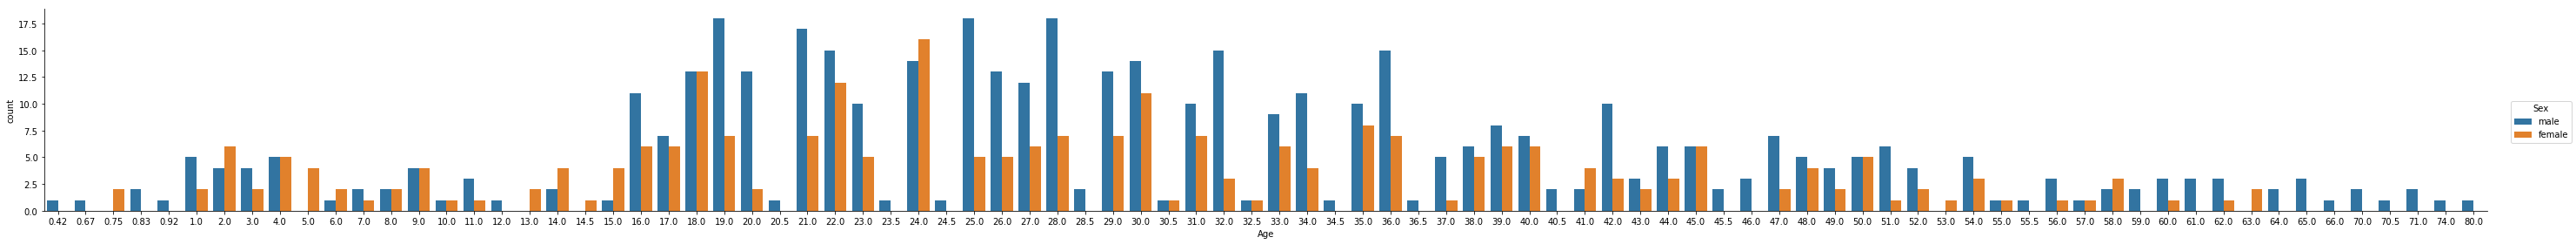

In [15]:
#Again by using facterplot, we try to figure out the variation of gender on basis of Age group.
sns.factorplot('Age',data=titanic_df,hue='Sex',kind='count',size=4,aspect=10)

The factorplot do analyze the data and give us a picture but unfortunately the visualizations aren't clear and smooth as perfect as our old ones.This is where Kedplot comes to play.

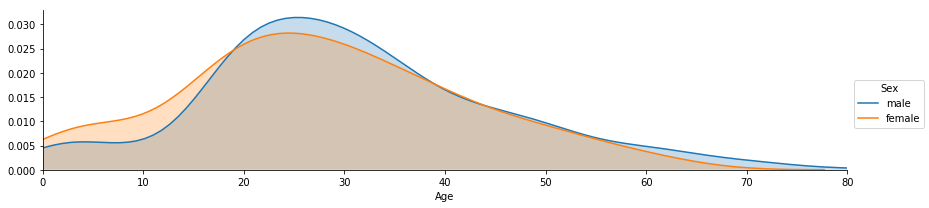

In [16]:
#We are using a FacetGrid plot here, the main perspective of using this is that FG are used to plot multiple Ked in one plot  

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x -axis max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend,this line enables the preview of plot.
fig.add_legend()


Well this looks perfect and gives us a much better perspective of our data than a histogram that most of the young people on
board were male.
Now, again we will plot this data for the person column we made.

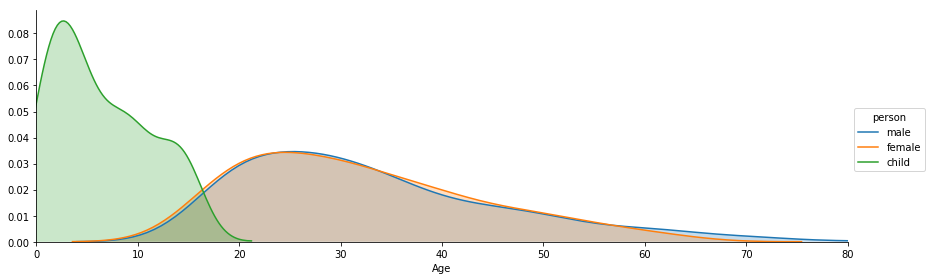

In [17]:
# We do the same thing for the 'person' column to include children:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=3,size=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

You will feel sad to know that there were more number of children on the ship as compared to elder and they were of Age group < 10 

Now we will try to figure out how is Age related to Class 

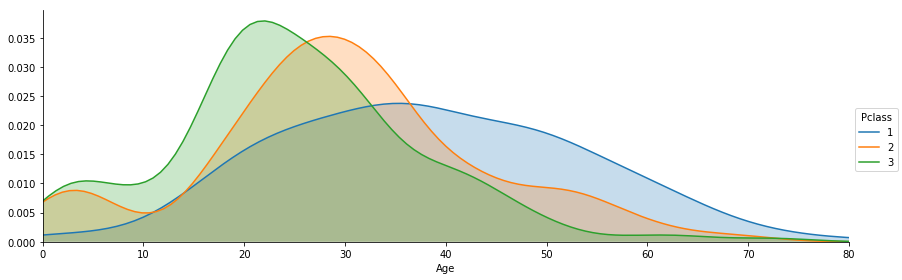

In [18]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=3,size=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

This Kedplot tells us that young people belonging between age 10 - 40 were mostly of class 3 and also the chlildren who were in age group < 10 were also of class 3

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our second question


Q2.)What deck were the passengers on and how does that relate to their class?

In [19]:
# Let's get a quick look at our dataset again for second question.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


If we look at the Cabin column we can see that there are some null values present i.e. there no information about that passenger's cabin so in order to do an analysis we need to remove this null values and then do the analysis. 

In [20]:
#This piece of code assigns the deck variable all the values of Cabin by filtering out the null values
deck = titanic_df['Cabin'].dropna()

In [21]:
#let's check out deck to ensure ourself
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

But, here also the cabin section contained the values which contains information about deck and seat number both and right now we only need the information about deck so we will further extract out appropriate info. 

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

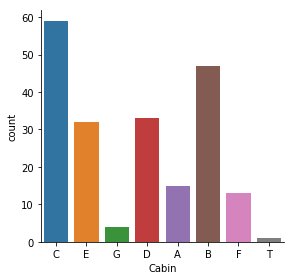

In [22]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels=[]

# Loop to grab first letter
for level in deck:
    levels.append(level[0])
    
# Reset DataFrame and use factor plot
cabin_df = DataFrame(data=levels,columns=['Cabin'])

sns.factorplot('Cabin',data=cabin_df,kind='count')

Here we have a 'T' deck value which is almost negligible so we can drop it out with the following code.

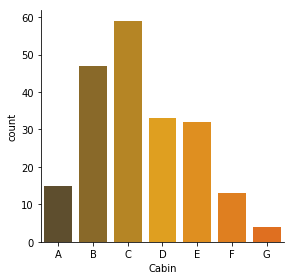

In [23]:
# Redefine cabin_df as everything but ignore where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin!='T']

#Again by plotting factorplot
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='autumn_d',order=['A','B','C','D','E','F','G'])

We can see that most of the passengers whose information were available were of Deck C and Deck G was very less populated

Now we have also answered out second question time to go for third question.

Q3.) Where did the passengers come from?

In [24]:
#Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on the readme file you'll note that these stand for Cherbourg, Queenstown, Southhampton.

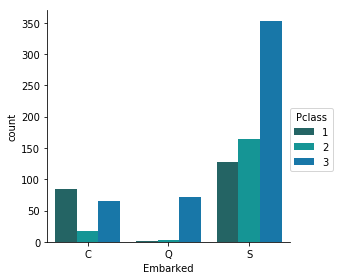

In [25]:
# Now we can make a factorplot to check out the results, note the x_order argument, used to deal with NaN values
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass',palette='winter_d',order=['C','Q','S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were of third class and most number of passengers whether of class 1, 2, 3 were from Southhampton.

Now let's take a look at the 4th question:

Q4.) Who was alone and who was with family?

In [26]:
#Let us create a new column in our dataset as 'Alone' with includes the sum of values present in 'SibSp' and 'Parch' column
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [27]:
#Now let us check the column we created
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Now, we figured out a logic that if the sum of both the columns added together is 0 then the person is alone else he/she was with family.

In [28]:
# Look for >0 or ==0 to set values
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
#let's check whether our idea worked or not
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Yes, it worked ! 

Now again by using a factorplot we can easily see the number of people who were with family or alone

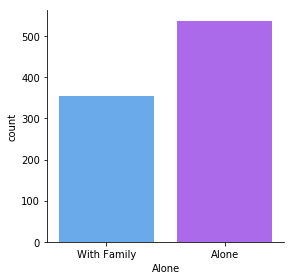

In [30]:
#Using factorplot to see Family or alone status
sns.factorplot('Alone',data=titanic_df,kind='count',palette='cool')

We can clearly see that most number of people on board were alone.

Now we come to our fourth question

Q5.) What factors helped someone survive the sinking?

In [31]:
#We create a new column name 'Survivor' and we will then map values from survived column by using dictionary- 0 for NO and 1 for YES
titanic_df['Survivor']=titanic_df.Survived.map({0:'No',1:'Yes'})

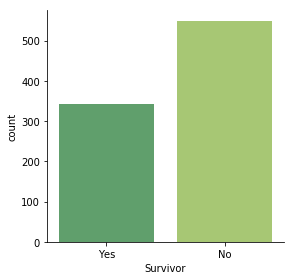

In [32]:
#Now plot the 'Survivor' column using factorplot
sns.factorplot('Survivor',data=titanic_df,palette='summer',kind='count',order=['Yes','No'])

The graph clearly shows that more people died as compared to than survived.Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

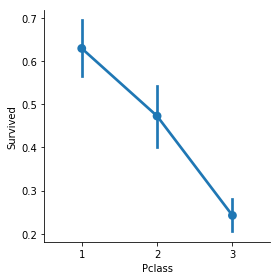

In [33]:
# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=titanic_df,kind='point')

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

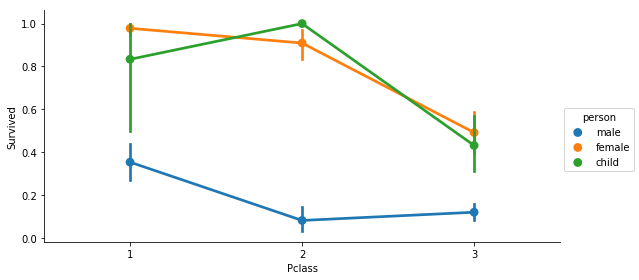

In [34]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person',kind='point',size=4,aspect=2)

From the data above we can see that being a male in third class is highly unfavorable for survival.But regarless of whichever class you belong if you're a male you have less chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

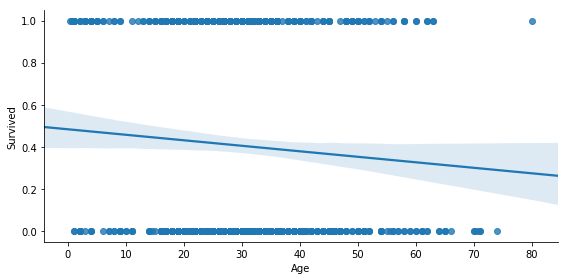

In [35]:
#For figuring out the answer to this question we need a linear plot
sns.lmplot('Age','Survived',data=titanic_df,aspect=2,size=4)

Linear plot shows us that being of older age reduces the chances of your survival.

Let's go ahead and use hue to take a look at the effect of class and age.

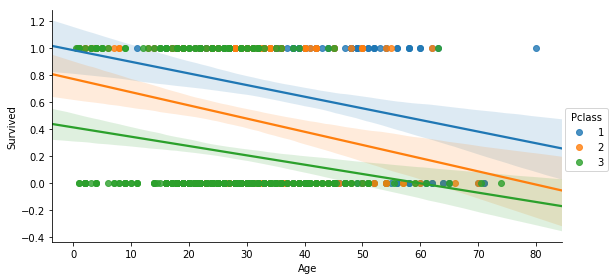

In [36]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,aspect=2,size=4)

So, this linear plot tells us that  being of class 3 also reduces the chance of survival

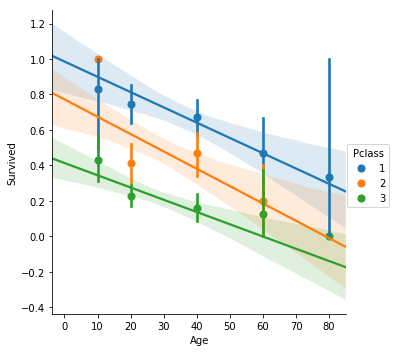

In [37]:
# Let's use a linear plot on age versus survival using hue for class seperation
#we create a list name 'age_samples' so that only these particular points will be plotted on graph
age_samples=[10,20,40,60,80]

#Now we will clean up the above figure little bit by using bins and setting hue as class
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=age_samples)

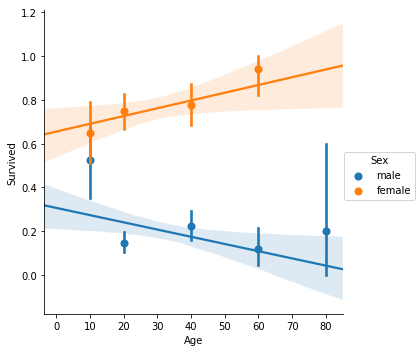

In [38]:
#Again we will plot a linear plot between Age and Survived 
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=age_samples)

We've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival.

Now we will answer furthermore questions

Q6.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [39]:
#Again we will check our cabin DataFrame.
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [40]:
#Now we will concatinate the 'cabin' with the 'Survived' column of titanic.
cabin_df=pd.concat([cabin_df,titanic_df['Survived']],axis = 1)

In [41]:
#Let us check our DataFrame again
cabin_df.head()

,Cabin,Survived
0,C,0
1,C,1
2,E,1
3,G,1
4,C,0


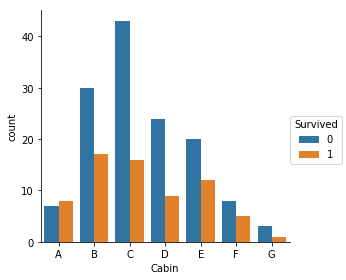

In [42]:
#Now we will use factorplot between 'Cabin' and 'Survived' column cabin_df DataFrame
sns.factorplot('Cabin',data=cabin_df, hue='Survived', kind='count',order=['A','B','C','D','E','F','G'])

Q7.) Did having a family member increase the odds of surviving the crash?

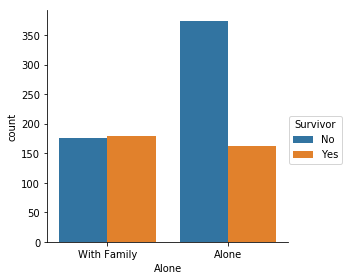

In [44]:
#For the above question we again use the factorplot on 'Alone' column using Survivor as hue. 
sns.factorplot('Alone',data=titanic_df,kind='count',hue='Survivor')

In the end guys do give some suggestions on improving this project. 

E-mail your suggestions at anshu.augustine@gmail.com